# LAMMPS Tutorial on the Materials Discovery Platform

## 1. Introduction
This is an introduction to using Lammps to conduct molecular dynamics simulations on the materials discovery platform. we will also be covering how to use Python to extract data from the Lammps output files.

## 2. Import the LAMMPS Examples Using Git

First we create a folder to work in for this exercise in the Materials Discovery hub, for example 'lammps_tut_1'.

In your terminal window, use 'cd' to enter this folder, then type the following command to import the LAMMPS examples:

Drag out the 'melt' folder from the 'lammps/examples' folder. This will be the model we work with for this exercise.

## 3. Adapting 'in.melt'

We now want to make some small adjustments to the 'in.melt' file, such as adapting the __sampling rate__ and recording particle positions. If we open 'in.melt' we will see a commented out 'dump id all atoms' line -- we would like to record the positions so remove the comment. Additionally, we would like to sample the thermodynamics data more frequently, not just every 50 points, so change the 'thermo' line to something smaller.

## 4. Using Python for Data Analysis

Now that we've run Lammps and we have acquired our data, we can use Python to extract and plot it.

### 4.1. Thermodynamic Data

The thermodynamic data (the total system energy and the temperature) are contained in the 'out.melt' file. We could manually extract the data, but we can also use a Python script to read the file and automatically extract the relevant data. 

In [8]:
# using python to extract data into an easy to plot format

time_step = []
temps = []
tot_eng = []

# we open and read the out.melt file that contains the thermodynamics data 
# make sure you have the correct path to your melt file here, else it will not work!
with open('/home/jovyan/melt/out.melt') as file:
    # creating a variable that tells us if we should extract data from the file or not
    extract = False
    
    # looping over each line of the file to check what it contains
    for line in file:
        
        # break out of the loop if we have reached the end of the data
        if "Loop time" in line:
            break
        
        # if the line meets the conditions we extract the data from the columns, converting to a 'float' format
        if extract == True:

            time_step.append(float(line.split()[0]))
            temps.append(float(line.split()[1]))
            tot_eng.append(float(line.split()[4]))
        
        # checks for the line above the data to set the 'extract' variable to 'True'
        if "Step Temp" in line:
            extract = True  

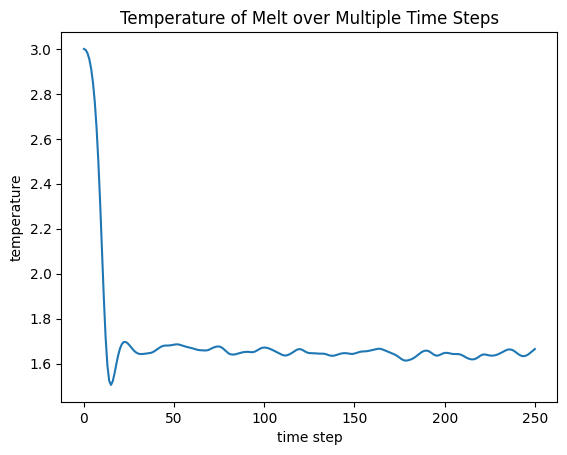

In [10]:
import matplotlib.pyplot as plt

plt.plot(time_step, temps)
plt.xlabel('time step')
plt.ylabel('temperature')
plt.title('Temperature of Melt over Multiple Time Steps')
plt.show()

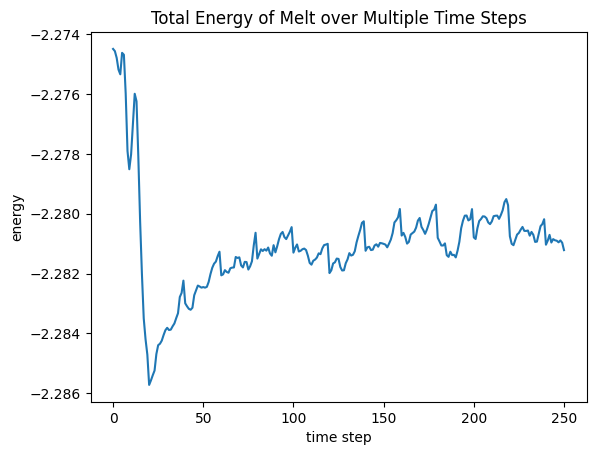

In [11]:
plt.plot(time_step, tot_eng)
plt.xlabel('time step')
plt.ylabel('energy')
plt.title('Total Energy of Melt over Multiple Time Steps')
plt.show()

### 4.2. Trajectory Plotting

We can use the 'dump.melt' file to get the coordinates of every molecule at the sampled timesteps. Again, we can use Python to convert this data into a useful format.

Here we write another sccript, now to parse the 'dump.melt' file and extract all of the particle positions.

In [12]:
timestep = []
positions = []

# writing a loop to extract the position of every atom at each recorded timestep
with open('lamps_tut_1/melt/dump.melt') as file:
    # creating variables that tells us if we should extract data from the file or not
    coordinate = False
    step = False
    tempcoords = []
    
    # looping over each line of the file to check what it contains
    for line in file:
        
        #script to execute if 'step' condition is true
        if step == True:
            timestep.append(float(line))
            step = False
        
        # setting 'coordinate' to false and 'step' to true if 
        #'ITEM: TIMESTEP' is in the line
        if 'ITEM: TIMESTEP' in line:
            coordinate = False
            step = True
        
        # script to execute if 'step' is true
        if coordinate == True:
            tempcoords.append([float(line.split()[2]), 
                               float(line.split()[3]), float(line.split()[4])])
            if float(line.split()[0]) == 4000:
                positions.append(tempcoords)
                tempcoords = []

        # setting 'coordinate' to true if 'ITEM: ATOMS' is in the line
        if 'ITEM: ATOMS' in line:
            coordinate = True
            

FileNotFoundError: [Errno 2] No such file or directory: 'lamps_tut_1/melt/dump.melt'

In [13]:
#print(positions[0])
import numpy as np

# picking the snapshot to illustrate
coords = np.array(positions[0]).T.tolist()


# making a 3d figure scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(coords[0], coords[1], coords[2], s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

IndexError: list index out of range

### 4.3. Animation

We can also use Python to animate the trajectories of the particles.

/home/jovyan/.local/lib/python3.9/site-packages/matplotlib/animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


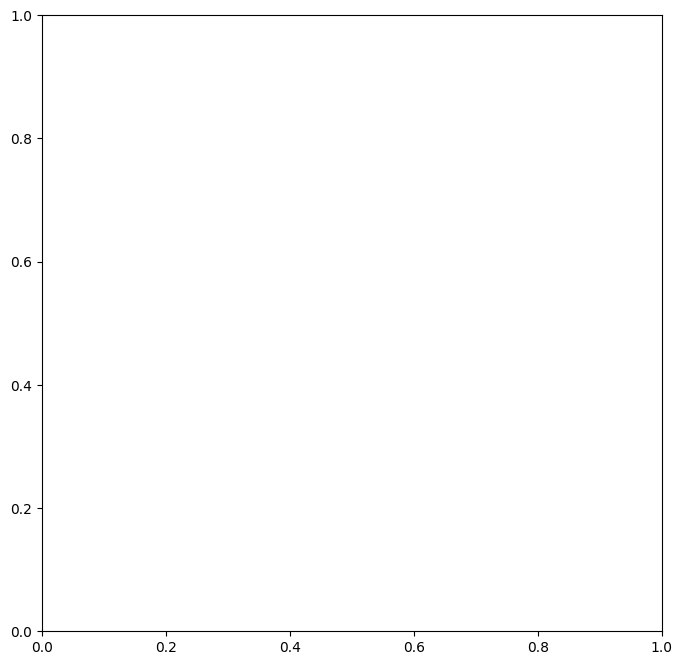

In [16]:
# importing some relevant Python libraries for animating
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
from IPython.display import HTML

# 3d visualisation
xyz=[[],[],[]]
fig, ax = plt.subplots(figsize=(8,8))


def animation_func_3d(i):
    
    # specifiying that 'ax' being used is the global one defined outside of the loop
    global ax
    
    ax.clear()
    plt.axis('off')
    
    xyz = np.array(positions[i]).T.tolist()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(xyz[0], xyz[1], xyz[2], s=4)
    ax.set_xlim(0.1,0.9) 
    ax.set_ylim(0.1,0.9)
    ax.set_zlim(0.1,0.9)
    plt.title(f"Timestep: {int(timestep[i])}")
    ax.set_axis_off()
    plt.tight_layout


animation = FuncAnimation(fig, animation_func_3d, interval = 65, frames=len(timestep))
#animation.save('animation.gif', writer='pillow')

HTML(animation.to_jshtml())

In [4]:
# 2d visualisation

xyz=[[],[],[]]
fig, ax = plt.subplots(figsize=(8,8))

def animation_func_2d(i):
    
    # specifiying that 'ax' being used is the global one defined outside of the loop
    global ax
    
    ax.clear()
    plt.axis('off')
    
    # using the z coordinate to determine the opacity of a data point
    xyz = np.array(positions[i]).T.tolist()
    alpha_vals = (np.array(xyz[2]) - min(xyz[2]))/(max(xyz[2])- min(xyz[2]))
    
    ax = fig.add_subplot()
    ax.scatter(xyz[0], xyz[1], s=4, alpha=alpha_vals)
    ax.set_xlim(0.1,0.9) 
    ax.set_ylim(0.1,0.9)
    ax.set_axis_off()
    plt.title(f"Timestep: {int(timestep[i])}")
    plt.tight_layout
    
animation2d = FuncAnimation(fig, animation_func_2d, interval = 65, frames=len(timestep))
#animation.save('animation.gif', writer='pillow')

HTML(animation2d.to_jshtml())

NameError: name 'plt' is not defined